In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [28]:
np.random.seed(5)

# make_classification creates random data, the data structure is the first item in the tupple x[0] include the randomized
# independant variables (features) and same size. nfeatures = n_inf + n_red + n_rep
# x[0] is what we will be working with for this exercise
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=5.0)

# Create a data frame from the data created using make_classification

x = pd.DataFrame(data = data[0], columns = ['var1', 'var2'])

In [29]:
x.head()

,var1,var2
0,-4.933293,-5.271220
1,-4.766789,5.779921
2,4.903096,5.449817
3,-5.589190,-4.083275
4,4.928016,-5.233981


In [34]:
from sklearn.cluster import KMeans

# Create the parameters of 5 clusters and initialize the parameters
k_m = KMeans(n_clusters = 5, init = 'random')

# run the K-Means Model 
k_m.fit_predict(x)

# k_m.labels_ will provide labels (cluster number) for each data point (sample)
# k_m.cluster_centers_ will provide coordinates for each of the clusters

print(k_m.labels_)
print(k_m.cluster_centers_)


[1 4 2 1 0 2 2 0 3 4 2 2 2 1 2 0 0 4 1 1 0 0 3 0 2 2 1 0 2 0 0 0 1 1 0 0 1
 4 0 2 1 3 2 1 1 2 3 4 3 3 1 4 0 1 2 1 3 2 3 0 0 1 2 3 2 1 0 0 2 1 2 2 3 4
 1 0 3 1 4 0 0 1 2 3 4 0 4 3 1 2 1 2 2 4 2 4 1 1 0 0]
[[ 5.15869258 -4.98084388]
 [-5.10522201 -4.80707562]
 [ 4.97456236  4.93481373]
 [-5.89124206  4.71208567]
 [-4.34604482  5.36124764]]


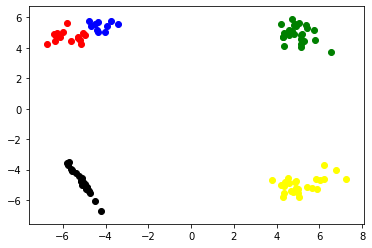

In [31]:
colors = {0 : 'black', 1: 'red', 2: 'green', 3: 'blue', 4 : 'yellow'}

for (index, obs), label in zip(x.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colors[label])
plt.show()

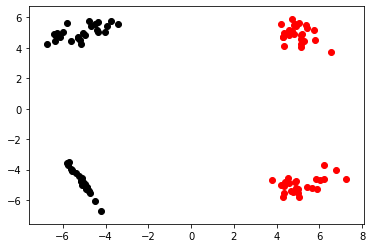

In [32]:
k_m = KMeans(n_clusters = 2, init = 'random')
k_m.fit_predict(x)

for (index, obs), label in zip(x.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colors[label])
plt.show()

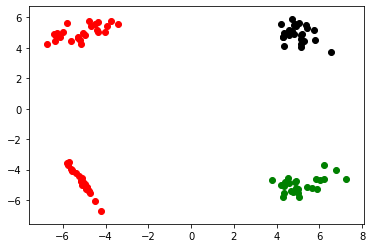

In [33]:
k_m = KMeans(n_clusters = 3, init = 'random')
k_m.fit_predict(x)

for (index, obs), label in zip(x.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colors[label])
plt.show()

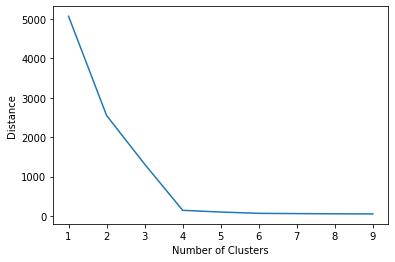

In [38]:
# We will determine the optimal number of clusters by calculating the sum of square errors (SSE) as we add clusters
# As more clusters are added, the benefits will be diminished as will be illustrated

#Create the data and the data frame
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=5.0)

x = pd.DataFrame(data = data[0], columns = ["var1", "var2"])
sse = {}

for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, init = 'random', max_iter=20).fit(x)
    
    # Inertia is the cumulative distance of each observation from its closets centroid
    sse[n] = kmeans.inertia_
    
    # The plot will help determine where benefits of more centroids (elbow) has diminishing returns
    
plt.figure
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.show()

    
    
    

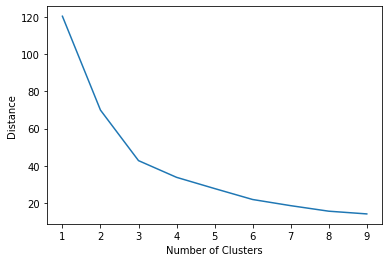

In [39]:
# A second example reducing the separation

#Create the data and the data frame
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=.4)

x = pd.DataFrame(data = data[0], columns = ["var1", "var2"])
sse = {}

for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, init = 'random', max_iter=20).fit(x)
    
    # Inertia is the cumulative distance of each observation from its closets centroid
    sse[n] = kmeans.inertia_
    
    # The plot will help determine where benefits of more centroids (elbow) has diminishing returns
    
plt.figure
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.show()